## 🚀TELECOM X - PARTE 2

La segunda parte del presente Challenge consiste en desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

## 📊 Importación de datos

Se importan los datos del Dataset trabajado en TelecomX parte 1. El archivo esta en formato .CSV

In [44]:
import pandas as  pd
import warnings
warnings.filterwarnings('ignore')

datos = pd.read_csv('/content/datos_tratados.csv')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Churn_Num
0,0002-ORFBO,0,Female,0,Yes,Yes,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0
1,0003-MKNFE,0,Male,0,No,No,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0
2,0004-TLHLJ,1,Male,0,No,No,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,0011-IGKFF,1,Male,1,Yes,No,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1
4,0013-EXCHZ,1,Female,1,Yes,No,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


### Eliminación de columnas irrelevantes
Una vez completada la importación del archivo se procede a eliminar por ejemplo la columna CustomerID. Para no generar inconvenientes más adelante en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos

In [45]:
#Realice una pequeña revisión para comprobar que no hubiesen espacios o diferencias en los nombres de las columnas
print(datos.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Churn_Num']


In [46]:
# A continuación se verifico que no hubiesen por espacios ni mayúsculas para normalizar los nombres y evitar errrores
datos.columns = datos.columns.str.strip()
datos.columns = datos.columns.str.strip().str.lower()
datos.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias,churn_num
0,0002-ORFBO,0,Female,0,Yes,Yes,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0
1,0003-MKNFE,0,Male,0,No,No,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0
2,0004-TLHLJ,1,Male,0,No,No,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,0011-IGKFF,1,Male,1,Yes,No,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1
4,0013-EXCHZ,1,Female,1,Yes,No,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


In [47]:
# Finalmente se procedio a eliminar la columna customerid
datos = datos.drop('customerid', axis=1)
datos.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias,churn_num
0,0,Female,0,Yes,Yes,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0
1,0,Male,0,No,No,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0
2,1,Male,0,No,No,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,1,Male,1,Yes,No,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1
4,1,Female,1,Yes,No,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


### Despliegue de Dataframe completo para verificación de los datos

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
datos.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias,churn_num
0,0,Female,0,Yes,Yes,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0
1,0,Male,0,No,No,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0
2,1,Male,0,No,No,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,1,Male,1,Yes,No,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1
4,1,Female,1,Yes,No,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


### Eliminación de la columna churn_num

Se elimina esta columna porque tiene los mismos valores que la columna churn. Esto se realiza para evitar confusiones o duplicidad de los datos.

In [49]:
datos.drop("churn_num", axis=1, inplace=True)
datos.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
0,0,Female,0,Yes,Yes,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0,Male,0,No,No,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1,Male,0,No,No,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1,Male,1,Yes,No,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,Yes,No,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### Renombrar Columnas a Español

Se realiza un mapeo para la traducción de los nombres de las columnas de ingles a español, con el proposito de facilitar la compresión del Dataframe.

In [50]:
datos = datos.rename(columns= {
    "churn": "abandono",
    "gender": "genero",
    "seniorcitizen": "ciudadano_senior",
    "partner": "tiene_pareja",
    "dependents": "tiene_dependientes",
    "tenure": "meses_antiguedad",
    "phoneservice": "servicio_telefonico",
    "multiplelines": "lineas_multiples",
    "internetservice": "servicio_internet",
    "onlinesecurity": "seguridad_online",
    "onlinebackup": "respaldo_online",
    "deviceprotection": "proteccion_dispositivo",
    "techsupport": "soporte_tecnico",
    "streamingtv": "tv_streaming",
    "streamingmovies": "peliculas_streaming",
    "contract": "contrato",
    "paperlessbilling": "factura_electronica",
    "paymentmethod": "metodo_pago",
    "cobros_mensuales": "cargos_mensuales",
    "cobros_totales": "cargos_totales"
})
datos.head()

,abandono,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_antiguedad,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,contrato,factura_electronica,metodo_pago,charges.monthly,charges.total,cuentas_diarias
0,0,Female,0,Yes,Yes,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0,Male,0,No,No,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1,Male,0,No,No,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1,Male,1,Yes,No,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,Yes,No,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### Verificación para la codificación de las variables

In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7267 non-null   int64  
 1   genero                  7267 non-null   object 
 2   ciudadano_senior        7267 non-null   int64  
 3   tiene_pareja            7267 non-null   object 
 4   tiene_dependientes      7267 non-null   object 
 5   meses_antiguedad        7267 non-null   int64  
 6   servicio_telefonico     7267 non-null   int64  
 7   lineas_multiples        7267 non-null   object 
 8   servicio_internet       7267 non-null   object 
 9   seguridad_online        7267 non-null   object 
 10  respaldo_online         7267 non-null   object 
 11  proteccion_dispositivo  7267 non-null   object 
 12  soporte_tecnico         7267 non-null   object 
 13  tv_streaming            7267 non-null   object 
 14  peliculas_streaming     7267 non-null   

**Observación del Dataframe**

Algunas columnas son de tipo string (object) por esto es necesario modificarlos para que sea compatibles con nuestros modelos de ML.

In [52]:
# Lista de columnas categóricas a convertir
columnas_categoricas = [
    "genero", "tiene_pareja", "tiene_dependientes", "lineas_multiples",
    "servicio_internet", "seguridad_online", "respaldo_online",
    "proteccion_dispositivo", "soporte_tecnico", "tv_streaming",
    "peliculas_streaming", "contrato", "factura_electronica", "metodo_pago"
]

# Crear un nuevo DataFrame con las columnas codificadas
datos_codi = pd.get_dummies(datos, columns=columnas_categoricas, drop_first=True)

# Verificar que el nuevo dataframe existe y está correcto
print(datos_codi.head())

   abandono  ciudadano_senior  meses_antiguedad  servicio_telefonico  charges.monthly  charges.total  cuentas_diarias  genero_Male  tiene_pareja_Yes  tiene_dependientes_Yes  lineas_multiples_No phone service  lineas_multiples_Yes  servicio_internet_Fiber optic  servicio_internet_No  seguridad_online_No internet service  seguridad_online_Yes  respaldo_online_No internet service  respaldo_online_Yes  proteccion_dispositivo_No internet service  proteccion_dispositivo_Yes  soporte_tecnico_No internet service  soporte_tecnico_Yes  tv_streaming_No internet service  tv_streaming_Yes  peliculas_streaming_No internet service  peliculas_streaming_Yes  contrato_One year  contrato_Two year  factura_electronica_Yes  metodo_pago_Credit card (automatic)  metodo_pago_Electronic check  metodo_pago_Mailed check
0         0                 0                 9                    1             65.6         593.30         2.186667        False              True                    True                       

In [53]:
datos_codi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   abandono                                    7267 non-null   int64  
 1   ciudadano_senior                            7267 non-null   int64  
 2   meses_antiguedad                            7267 non-null   int64  
 3   servicio_telefonico                         7267 non-null   int64  
 4   charges.monthly                             7267 non-null   float64
 5   charges.total                               7267 non-null   float64
 6   cuentas_diarias                             7267 non-null   float64
 7   genero_Male                                 7267 non-null   bool   
 8   tiene_pareja_Yes                            7267 non-null   bool   
 9   tiene_dependientes_Yes                      7267 non-null   bool   
 10  lineas_multi

In [54]:
# Lista de columnas que deben mantenerse como float64
cols_float = ["cargos_mensuales", "cargos_totales", "cuentas_diarias"]

# Convertir solo columnas booleanas a int64
for col in datos_codi.columns:
    if col not in cols_float and datos_codi[col].dtype == bool:
        datos_codi[col] = datos_codi[col].astype(int)

# Verificar cambios
print(datos_codi.dtypes)

abandono                                        int64
ciudadano_senior                                int64
meses_antiguedad                                int64
servicio_telefonico                             int64
charges.monthly                               float64
charges.total                                 float64
cuentas_diarias                               float64
genero_Male                                     int64
tiene_pareja_Yes                                int64
tiene_dependientes_Yes                          int64
lineas_multiples_No phone service               int64
lineas_multiples_Yes                            int64
servicio_internet_Fiber optic                   int64
servicio_internet_No                            int64
seguridad_online_No internet service            int64
seguridad_online_Yes                            int64
respaldo_online_No internet service             int64
respaldo_online_Yes                             int64
proteccion_dispositivo_No in

### Verificación de la codificación

In [55]:
# Se realizo la verificación para confirmar que las columnas nuevas que se generaron a partir de utilizar la función pd.get_dummies, sean ahora dtype int64 y no booleano.
datos_codi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   abandono                                    7267 non-null   int64  
 1   ciudadano_senior                            7267 non-null   int64  
 2   meses_antiguedad                            7267 non-null   int64  
 3   servicio_telefonico                         7267 non-null   int64  
 4   charges.monthly                             7267 non-null   float64
 5   charges.total                               7267 non-null   float64
 6   cuentas_diarias                             7267 non-null   float64
 7   genero_Male                                 7267 non-null   int64  
 8   tiene_pareja_Yes                            7267 non-null   int64  
 9   tiene_dependientes_Yes                      7267 non-null   int64  
 10  lineas_multi

### Verificación de la Proporción de abandono (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede ver reflejado de forma significativa en los modelos predictivos y en el análisis de los resultados.

Se Puede usar value_counts() de pandas para obtener esta proporción.

In [56]:
# Conteo de abandono
print("---- Conteo de Clientes por abandono ----")
conteo_abandono = datos_codi['abandono'].value_counts()
print(conteo_abandono.to_string())
print("-" * 40)
# Proporción de clientes por abandono en (%)
print("\n---- Proporción de Clientes por abandono (%) ----")
proporcion_evasion = datos_codi['abandono'].value_counts(normalize=True) * 100
print(proporcion_evasion.round(2).to_string())


---- Conteo de Clientes por abandono ----
abandono
0    5398
1    1869
----------------------------------------

---- Proporción de Clientes por abandono (%) ----
abandono
0    74.28
1    25.72


**Observaciónes**

Al utilizar value_counts(), cuya función en este caso fue para contar las apariciones de cada valor único (0 para 'No' y 1 para 'Sí'). De igual manera, se utilizo .to_string() para poder imprimir el resultado de forma limpia.

Respecto a la proporción de clientes por abandono. Se utilizo 'normalize=True' para calcular la proporción (ej. 0.74), y al multiplicar por 100 se convierte a porcentaje. Asimismo, se empleo el parámetro .round(2) para redondear el resultado a dos decimales para una mejor presentación, ya que por lo general se obtiene muchos decimales.

**Observaciones**

***Variables Positivamente relacionadas con el abandono***


**| Variable | Correlación | | Intepretación |**

| servicio_internet_Fiber optic | 0.300 | El servicio de fibra óptica puede no ser el mejor o presentar problemas tecnicos |

| metodo_pago_Electronic check | 0.294 | Este método de pago puede ser el más fiable pero tambien puede presentar problemas por su automatización |

| cuentas_diarias | 0.189 | La esta posicionada como la tercera opción porque quizas a los clientes no les agrade este tipo de cuenta con una periodicidad diferente a la mensual.

***Variables Negativamente relacionadas con el abandono***

**| Variable | Correlación | | Intepretación |**

| meses_antiguedad | -0.344 | Mientras más antiguedad tenga un cliente es probable que su fidelización a la empresa sea más alta.

| contrato_Two year | -295 | Los clientes que tienen un contrato por tan largo plazo son los que más tiempo llevan con la compañia.

| charges.total (Cargos totales) | -0.193 | Este tipo de cliente que ha pagado valores superiores son los que más interesados estan en permanecer con la empresa.

### Separación de Características (X) y Variable Objetivo (y)

In [57]:
#Variable X = Esta variable contiene todas las columnas que servirán como características para el modelo ( expeto la columna 'abandono').
#Variable Y = Esta varaible contiene únicamente la columna objetivo ('abandono') con la cual se quiere predecir.

#variables explicativas
X = datos_codi.drop('abandono', axis=1)

#variable de respuesta
y = datos_codi['abandono']

### Separación de Datos en Train y Test

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Balanceo de Clases con SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Aplicación de SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#verificación del nuevo balance

print('Distribución original de clases:', Counter(y))
print('Distribución después de SMOTE:', Counter(y_train_res))

Distribución original de clases: Counter({0: 5398, 1: 1869})
Distribución después de SMOTE: Counter({0: 3778, 1: 3778})


**Observaciones tras el uso de SMOTE**



1.   Previamente en la distribucón de clases sin el uso de SMOTE, la clases 0, es decir los clientes que no abandoraron los servicios de la empresa, era mucho mayor que la clase 1.
2.   Después de la aplicación del SMOTE. Ambas clases (0,1) estan balanceadas.

### Normalización con la técnica de preprocesamiento StandardScaler

In [60]:
#Se importa la clase StandardScaler de la librería scikit-learn.
#Scikit-learn se utiliza para estandarizar las características del conjunto de datos.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

### Creación del Dataframe Escalado

In [61]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Se agrega la variable objetivo (abandono) previamente balanceada para realizar el análisis correlacional.
X_train_scaled_df['abandono'] = y_train_res.values

### Visualización del Dataframe

In [62]:
print (X_train_scaled_df.head())

   ciudadano_senior  meses_antiguedad  servicio_telefonico  charges.monthly  charges.total  cuentas_diarias  genero_Male  tiene_pareja_Yes  tiene_dependientes_Yes  lineas_multiples_No phone service  lineas_multiples_Yes  servicio_internet_Fiber optic  servicio_internet_No  seguridad_online_No internet service  seguridad_online_Yes  respaldo_online_No internet service  respaldo_online_Yes  proteccion_dispositivo_No internet service  proteccion_dispositivo_Yes  soporte_tecnico_No internet service  soporte_tecnico_Yes  tv_streaming_No internet service  tv_streaming_Yes  peliculas_streaming_No internet service  peliculas_streaming_Yes  contrato_One year  contrato_Two year  factura_electronica_Yes  metodo_pago_Credit card (automatic)  metodo_pago_Electronic check  metodo_pago_Mailed check  abandono
0         -0.400399          1.853354             0.342667         1.384786       2.591501         1.384786    -0.867363          1.298132                1.945587                          -0.2912

### Análisis de correlación con los datos normalizados

In [63]:
# Matriz de correlación completa
matriz_corr = X_train_scaled_df.corr()

# Seleccionamos las correlaciones con la variable 'abandono' (sin incluir ella misma)
corr_abandono = matriz_corr['abandono'].drop('abandono')

# Filtramos las variables con correlación fuerte (mayor a ±0.15 por ejemplo)
umbral = 0.15
variables_correlacionadas = corr_abandono[abs(corr_abandono) > umbral].sort_values(ascending=False)

# Mostramos el top de variables correlacionadas
print(variables_correlacionadas)

servicio_internet_Fiber optic                 0.322423
cuentas_diarias                               0.237459
charges.monthly                               0.237459
metodo_pago_Electronic check                  0.203674
genero_Male                                  -0.165772
proteccion_dispositivo_Yes                   -0.185832
metodo_pago_Mailed check                     -0.200723
charges.total                                -0.221240
respaldo_online_Yes                          -0.221920
metodo_pago_Credit card (automatic)          -0.264141
contrato_One year                            -0.288876
respaldo_online_No internet service          -0.295868
tv_streaming_No internet service             -0.295868
soporte_tecnico_No internet service          -0.295868
servicio_internet_No                         -0.295868
seguridad_online_No internet service         -0.295868
peliculas_streaming_No internet service      -0.295868
proteccion_dispositivo_No internet service   -0.295868
seguridad_

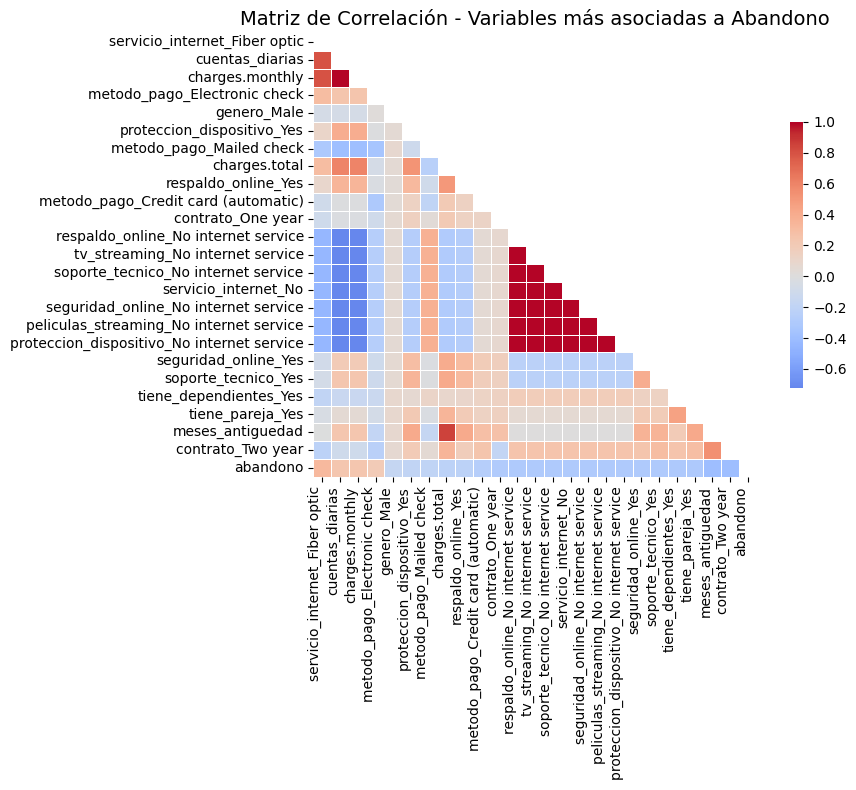

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Submatriz solo con variables más correlacionadas con abandono
vars_corr = list(variables_correlacionadas.index) + ['abandono']
sub_matriz = X_train_scaled_df[vars_corr].corr()

# Crear una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(sub_matriz, dtype=bool))

# Tamaño y estilo del gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(sub_matriz,
            mask=mask,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .6},
            annot=False)  # Aquí se ocultan los números
plt.title('Matriz de Correlación - Variables más asociadas a Abandono', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

###📊 Observaciones sobre el gráfico Matriz de correlación


*   Se evidencia la antigüedad del cliente y los tipos de contratos son los factores más críticos en la predicción del abandono.
*   La contratación de de otros servicios como por ejemplo: Soporte, respaldo, seguridad. Tambien influyen en el abandono.
*   Es muy importante resaltar que los clientes con mayor propensión a abandonar la empresa, son quienes no contratan servicios adicionales.

### 🎯Baseline con modelo Dummy - Entrenando el modelo

In [65]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train,y_train)
y_pred_dummy = dummy.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

acc_dummy = accuracy_score(y_test, y_pred_dummy)
rec_dummy = recall_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)

#Se procede a guardar los resultados en un DataFrame para futuras comparaciones

benchmark_results = pd.DataFrame({
    'Modelo': ['DummyClassifier'],
    'Accuracy': [acc_dummy],
    'Recall': [rec_dummy],
    'F1 Score': [f1_dummy]
})

print("👍 Resultado del modelo Dummy:")
display(benchmark_results)

👍 Resultado del modelo Dummy:


,Modelo,Accuracy,Recall,F1 Score
0,DummyClassifier,0.742779,0.0,0.0


**Observaciónes**



*   Utilizando el modelo Dummy se evidencio que la estrategia "most_frequent" arrojo los resultados de prediccón de la clase más común de los datos. En este caso puntual sería clientes que no abandonan.
*   Aunque logro una gran precisión (accuracy) debido al desbalance en la variable objetivo, su (recall) y (F1 Score) son nulos, lo que indica que no identifica correctamente a los clientes que sí abandonan el servicio.
*   Es posible afirmar que se necesita hacer mucho enfasís en en recall y F1. Son fundamentales para poder indentificar churn(abandono). Se debera perfeccionar lo más que se pueda en los siguientes avances.


### Selección de k justificada por desempeño

In [67]:
print("Total de columnas disponibles:", X_train_scaled_df.drop(columns='abandono').shape[1])

Total de columnas disponibles: 31


In [68]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Verifica el total de columnas para no exceder
max_k = X_train_scaled_df.drop(columns='abandono').shape[1]  # 30 en tu caso
k_range = range(2, max_k + 1)  # de 2 hasta 30
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

# Entrenar y evaluar modelo para cada k
for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(
        X_train_scaled_df.drop(columns='abandono'),
        X_train_scaled_df['abandono']
    )
    selected_cols = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

    # Entrenar modelo
    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono'])

    # Preparar test set con las mismas columnas seleccionadas
    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    # Predecir y calcular métricas
    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar métricas
    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

# Mostrar tabla final
print("📊 Rendimiento del modelo por cantidad de features (k):")
display(metricas)

📊 Rendimiento del modelo por cantidad de features (k):


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Accuracy,0.6923,0.7075,0.7166,0.7102,0.7121,0.7006,0.7387,0.7428,0.7377,0.74,0.7318,0.7341,0.7364,0.7464,0.7455,0.7524,0.7519,0.757,0.7607,0.7593,0.7556,0.757,0.7547,0.7552,0.7579,0.7565,0.7538,0.7565,0.7547,0.7538
Recall,0.6756,0.8164,0.7718,0.7558,0.7148,0.7077,0.7112,0.7201,0.7273,0.7273,0.7326,0.7308,0.7326,0.779,0.7843,0.7611,0.7665,0.7665,0.7683,0.7647,0.7718,0.7736,0.7736,0.7611,0.7701,0.7772,0.7807,0.7611,0.7683,0.7647
F1,0.5304,0.5894,0.5836,0.573,0.5608,0.5487,0.5833,0.5902,0.5879,0.59,0.5842,0.5857,0.5884,0.6125,0.6132,0.6126,0.6138,0.6187,0.6228,0.6204,0.619,0.6209,0.6187,0.6153,0.6207,0.6215,0.62,0.6166,0.617,0.6151


In [69]:
# Verifica el total de columnas para no exceder
max_k = X_train_scaled_df.drop(columns='abandono').shape[1]  # 30 en este caso

# Ajusta rango: de 20 hasta max_k (no más de 30)
k_range = range(20, max_k + 1)
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

# Entrenar y evaluar modelo para cada k
for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(
        X_train_scaled_df.drop(columns='abandono'),
        X_train_scaled_df['abandono']
    )
    selected_cols = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

    # Entrenar modelo
    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono'])

    # Preparar test set
    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    # Predecir y calcular métricas
    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar métricas
    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

# Mostrar tabla final
print("📊 Rendimiento del modelo por cantidad de features (k):")
display(metricas)

📊 Rendimiento del modelo por cantidad de features (k):


,20,21,22,23,24,25,26,27,28,29,30,31
Accuracy,0.7607,0.7593,0.7556,0.757,0.7547,0.7552,0.7579,0.7565,0.7538,0.7565,0.7547,0.7538
Recall,0.7683,0.7647,0.7718,0.7736,0.7736,0.7611,0.7701,0.7772,0.7807,0.7611,0.7683,0.7647
F1,0.6228,0.6204,0.619,0.6209,0.6187,0.6153,0.6207,0.6215,0.62,0.6166,0.617,0.6151


**Observaciones de rendimiento del modelo features (K)**

Accuracy:

Aumenta de forma constante desde hasta alcanzar un máximo de en el k=20 0.7607. El resto tienen ligeras variaciones.

En general desde el k=21 la precisión se estabiliza, mostrando rendimientos similares entre los siguentes K.

Recall:

Recall más alto: K=28 (0.7807), pero con caída en Accuracy.

F1 Score:

F1 más alto: K=20 (0.6228), seguido de cerca por K=27 (0.6215).

Luego de k=20, las mejoras en F1 son mínimas, incluso con pequeñas caídas ocasionales, indicando un punto óptimo alcanzado.

**Conclusión**

Analizando los resultados se ha decidido optar por el **K=28**
Si bien hubo tres opciones muy viables como K=20, K=27, K=28.
Cada uno tenia sus pros y contras pero al finalizar el análisis se opto por el K=28 debido a que, si bienTiene el Recall más alto (78.07%), aunque el Accuracy es un poquito más bajo que el K=27. El objetivo de este entrenamiendo de modelos es intentar predecir el abandono de los clientes, por lo cual con el objetivo que es la prevención de abandono, el K=28, por los beneficios, respecto a la detección del abandono y considero eso más importante que ganar 0.0027 en Accuracy.

### Dataset definitivo con K=28

In [70]:
# Reutilizamos el selector con k=28 para obtener las mejores features
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=28)
X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
selected_features = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

# Dataset final de entrenamiento y prueba
X_train_final = X_train_scaled_df[selected_features]
X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_test_final = X_test_scaled_df[selected_features]

X_test_final.shape[1]

28

In [71]:
#X_train_scaled → Para algoritmos sensibles a la escala. Más enfoncado en modelos Regresión Logística, KNN,SVM y Redes Neuronales.
#X_train_tree → Para algoritmos insensibles a la escala. Enfocado en modelos Random Forest, XGBoost, Arbol de decisión

X_train_scaled = X_train_scaled_df[selected_features]  # para modelos que requieren escala
X_train_tree   = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]  # para árboles

**Obsevaciones**


*   **X_train_scaled** para modelos que son sensibles a si una variable tiene valores muy grandes o muy pequeños, por eso requieren datos escalados.
*   **X_train_tree** para modelos no necesitan escalado, porque sus divisiones se basan en ordenamientos y no en distancias numéricas.



## 💻Creación de modelos

### Modelo 1 -  Regresión Logística

In [72]:
# Modelo 1: Regresión Logística (requiere datos escalados)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr.fit(X_train_scaled, y_train_res)

# Mostramos coeficientes e intercepto
print("Intercepto:", lr.intercept_)
print("Coeficientes (primeros 5):", lr.coef_[0][:5])

Intercepto: [-0.3174665]
Coeficientes (primeros 5): [-1.64753089  0.96584179  1.41259423  0.96584179 -0.2059569 ]


**Observaciones**


*   Intercepto: Es negativo y esta cerca del 0. Por ahora esto es el “punto de partida” del modelo antes de que las variables sumen o resten riesgo.
*   Coeficientes: Se evidencian 2 coeficientes negativos se puede interpretar como a mayor valor podría ser menor probabiliad de abandono. Ademas, señalan las variables que más influyen en la probabilidad de churn.



### Modelo 2 - Random Forest

In [73]:
# Modelo 2: Random Forest (No requiere datos escalados)
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_tree, y_train_res)

# Mostramos importancias de las 5 features top
importances = rf.feature_importances_
idx_top5 = importances.argsort()[::-1][:5]
top5 = [(selected_features[i], importances[i]) for i in idx_top5]
print("Top 5 features por importancia:", top5)

Top 5 features por importancia: [('contrato_Two year', np.float64(0.16657030152889987)), ('meses_antiguedad', np.float64(0.1038756488757375)), ('soporte_tecnico_Yes', np.float64(0.08865894999087323)), ('contrato_One year', np.float64(0.07952884515404776)), ('seguridad_online_Yes', np.float64(0.07079642096914715))]


**Observaciones**


1.   Las importancias de Gini nos dicen qué variables reducen más la impureza.
2.   Se evidencian las variables (Contrato_two year) tambien, (meses_antiguedad) entre las top, reflejando su peso en la predicción, confirmando el resultado del análisis de correlación realizado previamente.



### Modelo 3 K-Nearest Neighbors

In [74]:
# Modelo 3: K-Nearest Neighbors (requiere datos escalados)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=28,     # K óptimo
    weights='uniform',
    metric='minkowski', # distancia euclidiana por defecto
    p=2
)
knn.fit(X_train_scaled, y_train_res)

print("KNN ajustado con k =", knn.n_neighbors)

KNN ajustado con k = 28


**Observaciones**


1.   KNN memoriza todo el set de entrenamiento, por lo que k pequeño puede capturar ruido.
2.   KNN es fundamental para la clase (abandono), lo que es valioso para prevenir pérdidas.



## 🔎Evaluación de los Modelos

In [75]:
# Evaluación de los modelos creados Regresión Logística, Random Forest, KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Preparar X_test escalado y sin escalar según los modelos
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)[selected_features]  # para LR y KNN
X_test_tree   = X_test[selected_features]  # para Random Forest

# 2. Obtener predicciones de cada modelo
y_pred_logreg = lr.predict(X_test_scaled)
y_pred_rf     = rf.predict(X_test_tree)
y_pred_knn    = knn.predict(X_test_scaled)

# 3. Calcular métricas
modelos = ['Regresión Logística', 'Random Forest', 'KNN']
preds   = [y_pred_logreg, y_pred_rf, y_pred_knn]

resultados = []
for nombre, y_pred in zip(modelos, preds):
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    resultados.append([nombre, acc, prec, rec, f1])

df_resultados = pd.DataFrame(
    resultados,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)
display(df_resultados)

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.761577,0.528512,0.677362,0.593750
1,Random Forest,0.753783,0.514085,0.780749,0.619958
2,KNN,0.737735,0.493317,0.723708,0.586705


**Observaciones**

***Índice***

***Modelos*** Los tres modelos que se utilizarón para las predicciones.

***Accuracy:*** porcentaje de aciertos global.

***Precision:*** de las predicciones positivas, cuántas fueron correctas.

***Recall:*** proporción de positivos reales correctamente detectados.

F1 Score: media armónica de precision y recall.

**1. Regresión Logística**

Accuracy: 0.7616 → Aproximadamente 76% de las predicciones son correctas en general.

Precisión: 0.5285 → De todos los clientes que predijo como "abandono", un 52.8% realmente se iba a ir.

Recall: 0.6774 → Detecta el 67.7% de los casos reales de abandono.

F1 Score: 0.5938 → Balance medio entre precisión y recall.

📌 ***Interpretación:***
La regresión logística tiene un recall medio-alto y precisión media. Esto significa que logra encontrar una buena parte de los abandonos, pero también se le escapan bastantes (falsos negativos) y se equivoca con algunos falsos positivos.



---
**2. Random Forest**

Accuracy: 0.7538 → Similar a la regresión logística, un poco menor.

Precisión: 0.5141 → Un poco más baja que en regresión logística.

Recall: 0.7807 → El más alto de los tres modelos, detecta un 78% de los abandonos reales.

F1 Score: 0.6200 → El mejor F1 Score del grupo, lo que indica mejor balance entre precisión y recall.

📌 ***Interpretación:***
El Random Forest es el que más detecta abandonos (mejor recall) aunque sacrifica un poco la precisión. Esto, en tu contexto, es positivo: es mejor alertar de más casos (aunque algunos sean falsos positivos) que dejar pasar abandonos reales.


---

**3. KNN**

Accuracy: 0.7377 → El más bajo en exactitud global.

Precisión: 0.4933 → Casi la mitad de los casos que predice como abandono no lo son.

Recall: 0.7237 → Mejor que la regresión logística, pero peor que Random Forest.

F1 Score: 0.5867 → El más bajo junto con la regresión logística.

📌 ***Interpretación:***
El KNN se queda en un punto intermedio en recall pero con menor precisión y exactitud global. No es tan eficiente para tu caso comparado con Random Forest.

### Gráfica de matrices de confusión comparativas

Matriz de confusión — Regresión Logística:
[[1281  339]
 [ 181  380]] 

Matriz de confusión — Random Forest:
[[1206  414]
 [ 123  438]] 

Matriz de confusión — KNN:
[[1203  417]
 [ 155  406]] 



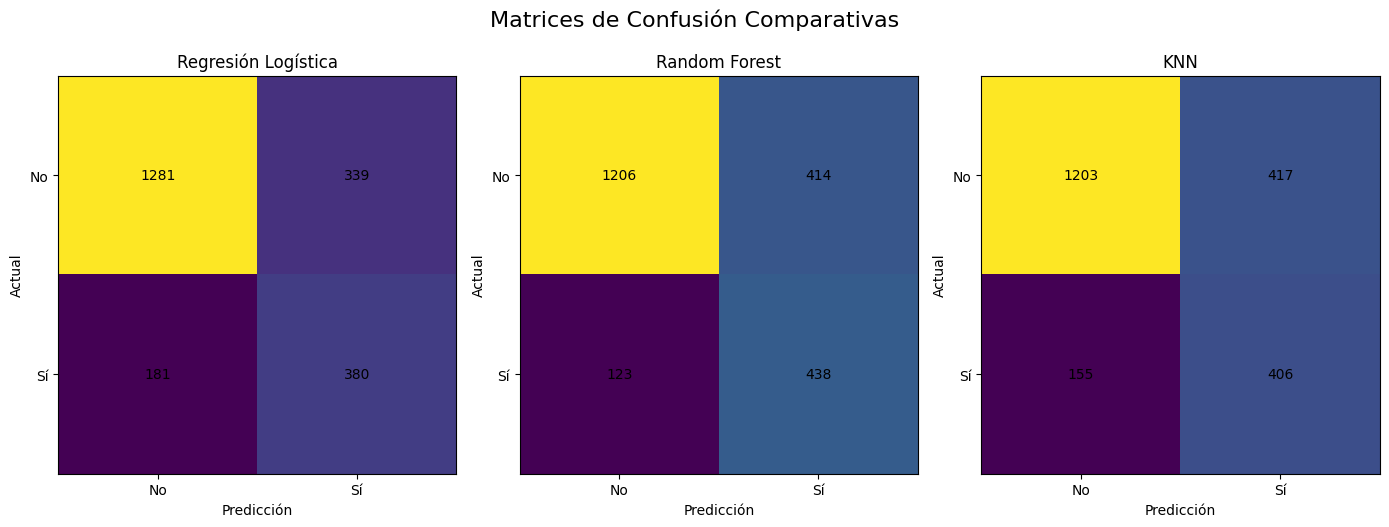

In [76]:
#Mostrar matrices de confusión
for nombre, y_pred in zip(modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matriz de confusión — {nombre}:")
    print(cm, "\n")

#Crea gráfica con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

for ax, nombre, y_pred in zip(axes, modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(nombre)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_yticklabels(['No', 'Sí'])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

plt.suptitle('Matrices de Confusión Comparativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observaciones**

|             | **Pred. No** | **Pred. Sí** |
| ----------- | ------------ | ------------ |
| **Real No** | TN           | FP           |
| **Real Sí** | FN           | TP           |


Las posiciones significan
*   TN (True Negatives): Casos reales de “No abandono” que el modelo predijo como “No abandono”.

*   FP (False Positives): Casos reales de “No abandono” que el modelo predijo erróneamente como “Abandono”.

*   FN (False Negatives): Casos reales de “Abandono” que el modelo no detectó.
*   TP (True Positives): Casos reales de “Abandono” detectados correctamente.



---

Análisis de las matrices de confusión



**1.   Regresión Logística**

TN = 1281 → Acertó con la mayoría de los que no abandonan.

FP = 339 → 339 personas que iban a quedarse fueron etiquetadas como abandono (falsos positivos).

FN = 181 → Se escaparon 181 abandonos reales.

TP = 380 → Detectó correctamente 380 abandonos.

🔍 Interpretación:

Tiene un buen balance, pero pierde más abandonos (FN) que Random Forest.
Menos falsos positivos que RF, pero a costa de dejar ir casos reales de abandono.

2.   **Random Forest**

TN = 1206 → Acertó con menos “No abandonos” que la regresión logística.

FP = 414 → Más falsos positivos que la regresión logística.

FN = 123 → Menos falsos negativos de todos los modelos → detecta casi todos los abandonos.

TP = 438 → Mayor número de abandonos detectados.

🔍 Interpretación:

Este modelo es agresivo en detectar abandonos, incluso a costa de más falsos positivos.
Para el objetivo (prevenir abandonos), este comportamiento es muy deseable porque pierde muy pocos casos reales (FN bajo).


3.   **KNN**

TN = 1203 → Muy similar a Random Forest.

FP = 417 → Un poco más de falsos positivos que la regresión logística.

FN = 155 → Mejor que la regresión logística, peor que Random Forest.

TP = 406 → Detecta más abandonos que la regresión logística, menos que Random Forest.

🔍 Interpretación:

Está en un punto intermedio: mejor recall que la regresión logística, pero sin llegar al nivel de Random Forest.
No destaca en precisión ni en recall frente al mejor modelo (RF).









### 🚀Ajustando los modelos para mejorarlos

In [77]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# Pipeline: SMOTE → Escalado → Regresión Logística
pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        solver='lbfgs',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

# Grid de hiperparámetros a probar
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2']
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda por F1-Score
gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv, scoring='f1', n_jobs=-1)
gs_lr.fit(X_train, y_train)

print("Mejores hiperparámetros (Regresión Logística):", gs_lr.best_params_)

# Evaluación sobre test
y_pred_lr = gs_lr.predict(X_test)
print("\nMétricas Regresión Logística (mejorada):")
print(f"Accuracy : {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_lr):.4f}")

Mejores hiperparámetros (Regresión Logística): {'clf__C': 0.01, 'clf__penalty': 'l2'}

Métricas Regresión Logística (mejorada):
Accuracy : 0.7648
Precision: 0.5327
Recall   : 0.6970
F1 Score : 0.6039


**Observaciones**

📊 Interpretación de las métricas

**Accuracy** (0.7648)

El modelo clasifica correctamente el 76,48 % de los casos.

Es un valor similar al que tenías antes (0.7616), lo que indica que la optimización no cambió drásticamente la capacidad global de acierto, pero sí pudo mejorar en otras métricas.

**Precisión** (0.5327)

Cuando el modelo predice “positivo” (p. ej., que un usuario abandonará o pertenece a la clase 1), acierta el 53,27 % de las veces.

Sigue siendo moderada, lo que implica que todavía hay un porcentaje importante de falsos positivos.

**Recall** (0.6970)

El 69,70 % de los casos positivos reales son detectados correctamente.

Esta es la mejora más notable: tu modelo ahora captura más casos positivos que antes (antes estaba en ~67,7 %).

Es útil si tu objetivo es no dejar pasar casos importantes (reducir falsos negativos).

**F1 Score** (0.6039)

Combina precisión y recall. El valor mejoró respecto al anterior (0.5937).

Indica un balance más sólido entre encontrar casos positivos y evitar falsos positivos.

### 🧠Modelos mejorados (Random Forest y Gradient Boosting)


In [78]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 1. Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2. Preparar subsets para entrenamiento y prueba
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]
X_test_df      = X_test[selected_features]
y_train_res    = y_train_res
y_test_series  = y_test

# 3. Escalado para los sensibles a escala (KNN)
scaler = StandardScaler().fit(X_train_res_df)
X_train_scaled = scaler.transform(X_train_res_df)
X_test_scaled  = scaler.transform(X_test_df)

# 4. Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearch για Random Forest
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 5]
}
gs_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    rf_grid, cv=cv, scoring='f1', n_jobs=-1
)
gs_rf.fit(X_train_res_df, y_train_res)

# 6. GridSearch para Gradient Boosting (control model)
gb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gs_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_grid, cv=cv, scoring='f1', n_jobs=-1
)
gs_gb.fit(X_train_res_df, y_train_res)

# 7. KNN baseline
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_res)

# 8. Predicciones
preds = {
    'Random Forest': gs_rf.predict(X_test_df),
    'Gradient Boosting': gs_gb.predict(X_test_df),
    'KNN': knn.predict(X_test_scaled)
}

# 9. Cálculo de métricas
results = []
for name, y_pred in preds.items():
    results.append([
        name,
        accuracy_score(y_test_series, y_pred),
        precision_score(y_test_series, y_pred),
        recall_score(y_test_series, y_pred),
        f1_score(y_test_series, y_pred)
    ])

df_results = pd.DataFrame(
    results,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)

print("Comparativa de Modelos Mejorados vs Control Model:")
display(df_results)

Comparativa de Modelos Mejorados vs Control Model:


,Modelo,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.774415,0.548660,0.693405,0.612598
1,Gradient Boosting,0.772123,0.553512,0.590018,0.571182
2,KNN,0.737276,0.491620,0.627451,0.551292


**Observaciones**

El uso de SMOTE + optimización de hiperparámetros sí ha mejorado métricas respecto a lo inicial, sobre todo en recall para RF.



---


1.   **Random Forest**
**Accuracy:** 0.7744: Por el momento es el mejor en acierto global, clasificando correctamente el 77,44 % de los casos.

**Precisión:** 0.5487: Cuando predice positivo, acierta el 54,87 % de las veces (ligeramente mejor que los otros modelos).

**Recall:** 0.6934: Pudo detectar casi el 69 % de los positivos reales, lo que es muy bueno si buscas reducir falsos negativos.

**F1 Score:** 0.6126: Es el valor más alto del conjunto, lo que parece indicar el mejor equilibrio entre precisión y recall.
2.   **Gradient Boosting**
**Accuracy:** 0.7721: Muy similar al RF, aproximadamente 0,23 % menor.

**Precisión:** 0.5535: Es el mejor en precisión, pero la diferencia con RF es mínima (+0.0048).

**Recall:** 0.5900: Bastante menor que el RF, lo que significa que se le escapan más positivos reales.

**F1 Score:** 0.5712 → Inferior al RF debido a la caída en recall.
3.   **KNN**
**Accuracy:** 0.7373: Se evidencia que es notablemente más bajo que RF y GB.

**Precisión:** 0.4916: Significa que es la más baja, lo que implica más falsos positivos.

**Recall:** 0.6275: Puede ser aceptable, pero desafortunadamente no compensa la baja precisión.

**F1 Score:** 0.5513: El más bajo del grupo.





### 🔍Comparativa Modelo Gradient Boosting vs Modelos mejorados


In [79]:
# Conjuntos de prueba
X_test_full   = X_test
X_test_df     = X_test_full[selected_features]

# Predicciones
y_pred_lr  = gs_lr.predict(X_test_full)
y_pred_rf  = gs_rf.predict(X_test_df)
y_pred_gb  = gs_gb.predict(X_test_df)

# Construcción del DataFrame comparativo
results = []
for name, y_pred in zip(
    ['Regresión Logística', 'Random Forest', 'Gradient Boosting'],
    [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_knn]
):
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

df_comparison = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(df_comparison)

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.764787,0.532698,0.696970,0.603861
1,Random Forest,0.774415,0.548660,0.693405,0.612598
2,Gradient Boosting,0.772123,0.553512,0.590018,0.571182


**Observaciones de las comparativas**

| Modelo                  | Accuracy   | Precision  | Recall     | F1 Score   | Perfil                                |
| ----------------------- | ---------- | ---------- | ---------- | ---------- | ------------------------------------- |
| **Regresión Logística** | 0.7648     | 0.5327     | **0.6970** | 0.6039     | Buen recall, pero precisión moderada. |
| **Random Forest**       | **0.7744** | 0.5487     | 0.6934     | **0.6126** | Mejor equilibrio general y mejor F1.  |
| **Gradient Boosting**   | 0.7721     | **0.5535** | 0.5900     | 0.5712     | Más preciso, pero pierde recall.      |



Random Forest sobresale como el modelo más equilibrado.

*   **Random Forest** sobresale como el modelo más equilibrado.
*   **Regresión Logística** se defiende muy bien y es competitiva, especialmente si buscas maximizar recall.
*   **Gradient Boosting** es más restrictivo y preciso, pero sacrifica cobertura en positivos.
*  Las diferencias en accuracy son pequeñas (~1%)



### 🚀Creando Modelo Ensemble

Este modelo combina múltiples modelos de aprendizaje automático individuales (también llamados aprendices base o estimadores) para crear un modelo predictivo más potente y preciso.

En este caso se van a combinar los modelos **Regresión Logística** y **Gradient Boosting**

In [80]:
from sklearn.ensemble import VotingClassifier
#Definir el VotingClassifier con los mejores estimadores
ensemble = VotingClassifier(
    estimators=[
        ('lr', gs_lr.best_estimator_),
        ('gb', gs_gb.best_estimator_)
    ],
    voting='soft'
)

# 2. Entrenar el ensemble
ensemble.fit(X_train, y_train)

# 3. Predecir en test
y_pred_ensemble = ensemble.predict(X_test)

# 4. Calcular métricas
metrics_ensemble = {
    'Accuracy':  accuracy_score(y_test, y_pred_ensemble),
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall':    recall_score(y_test, y_pred_ensemble),
    'F1 Score':  f1_score(y_test, y_pred_ensemble)
}

# 5. Mostrar resultados en una tabla
df_ensemble = pd.DataFrame([metrics_ensemble], index=['Ensemble LR + GB'])
display(df_ensemble)

,Accuracy,Precision,Recall,F1 Score
Ensemble LR + GB,0.78221,0.57363,0.597148,0.585153


**Observaciones**

| Modelo                  | Accuracy              | Precision             | Recall                | F1 Score              |
| ----------------------- | --------------------- | --------------------- | --------------------- | --------------------- |
| **Regresión Logística** | 0.7648                | 0.5327                | **0.6970**            | 0.6039                |
| **Gradient Boosting**   | 0.7721                | 0.5535                | 0.5900                | 0.5712                |
| **Ensemble LR+GB**      | *0.7822* | *0.5736* | *0.5971* | *0.5851* |



---

Un factor importante es que se evidencio una mejora en **Accuracy** y **Precision**

El ensemble logra el **mayor accuracy** (78.22%) de los tres modelos.

*   El ensemble logra el **mayor accuracy** (78.22%) de los tres modelos.
*   También obtiene la **mayor precisión** (57.36%), lo que significa que comete menos falsos positivos que LR y GB por separado.


Desafortunadamente tambien se evidencia una pérdida en **Recall**


*   El **recall** cae respecto al modelo de **regresión logística** (que tenía 69.70%), pero queda apenas por encima del de GB (59.00%).
*   Esto implica que el ensemble detecta menos positivos que LR, aunque sigue encontrando más que GB.

**F1 Score** intermedio


*   El **F1 Score** del ensemble (0.5852) es superior al de GB pero inferior al de LR.
*   Esto indica que, aunque el ensemble mejora la **precisión**, la caída en **recall** compensa parcialmente esa ganancia, resultando en un equilibrio que no supera el **F1 Score** de LR.


## 📶 Comparativa gráfica para seleccionar el Modelo más adecuado

**Comparativa visual de los modelos utilizando la curva ROC**

La curva ROC (Receiver Operating Characteristic) permite al usuario visualizar el rendimiento de los modelos clasificadores para todos los umbrales posibles.

**Los modelos para esta comparativa son:**

*   Logistic Regression
*   Random Forest
*   Gradient Boosting
*   KNN
*   Ensemble LR+GB (Logistic Regression + Gradient Boosting)


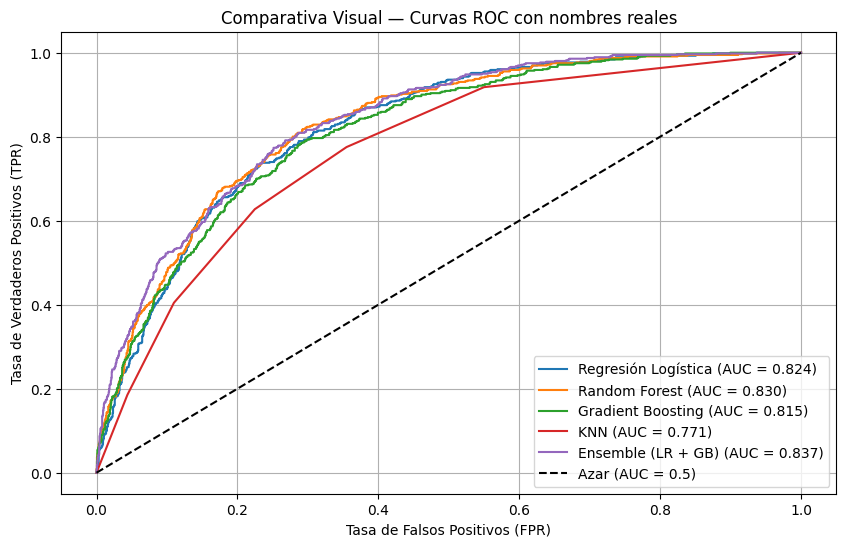

AUC de cada modelo:
Ensemble (LR + GB)        → AUC = 0.837
Random Forest             → AUC = 0.830
Regresión Logística       → AUC = 0.824
Gradient Boosting         → AUC = 0.815
KNN                       → AUC = 0.771


In [81]:
from sklearn.metrics import roc_curve, roc_auc_score


# Diccionario de modelos
modelos = {
    'Regresión Logística': gs_lr,
    'Random Forest': gs_rf,
    'Gradient Boosting': gs_gb,
    'KNN': knn,
    'Ensemble (LR + GB)': ensemble
}


# Para guardar resultados de AUC
auc_scores = {}

plt.figure(figsize=(10, 6))

for nombre, modelo in modelos.items():
    if nombre == 'Regresión Logística':
        y_proba = modelo.predict_proba(X_test_full)[:, 1]
    elif nombre == 'KNN':
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    elif nombre in ['Random Forest', 'Gradient Boosting']:
        y_proba = modelo.predict_proba(X_test_df)[:, 1]
    else:  # Ensemble
        y_proba = modelo.predict_proba(X_test_full)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    auc_scores[nombre] = auc
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.3f})')

# Línea de modelo aleatorio (referencia visual)
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparativa Visual — Curvas ROC con nombres reales')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Mostrar AUC ordenado de mayor a menor
print("AUC de cada modelo:")
for nombre, auc in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{nombre:25} → AUC = {auc:.3f}")

**Observaciones de la comparativa**

Se debe tener en consideración:

AUC (Área bajo la curva ROC) mide la capacidad del modelo para distinguir entre clases en todos los umbrales posibles.

Un AUC de 0.5 indica un modelo que no discrimina mejor que el azar ☝.

Cuanto más cerca de 1.0, mejor la discriminación ✅.


---

| Modelo                 | AUC       | Observación                                                                                                                           |
| ---------------------- | --------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Ensemble (LR + GB)** | **0.837** | Mejor desempeño general; combina bien la capacidad de discriminación de LR y GB.                                                      |
| Random Forest          | 0.830     | Muy competitivo, apenas 0.007 por debajo del ensemble; sólido en clasificación.                                                       |
| Regresión Logística    | 0.824     | Rendimiento estable; demuestra que un modelo lineal bien ajustado sigue siendo fuerte.                                                |
| Gradient Boosting      | 0.815     | Buen desempeño, pero en este caso no supera a RF ni a LR, lo que puede indicar que no está captando patrones extra que ellos no vean. |
| KNN                    | 0.771     | Significativamente más bajo; su capacidad de discriminación es limitada en comparación con los demás.                                 |



---

**🔍 Interpretaciones importantes**

1.  Según el análisis de los resultados, se puede afirmar que **Ensemble** es el modelo más apropiado para realizar predicciones. Sus métricas asi lo confirman, con un AUC de 0.837, tiene la mayor capacidad de distinguir positivos de negativos en todos los umbrales.

2.  Según el punto anterior sugiere que la combinación de LR y GB en modo soft voting logró capturar fortalezas complementarias.

3.  **Ensemble** mantiene métricas de clasificación constante.

4. Finalmente este modelo aprovecha al máximo la complementariedad entre modelos lineales y no lineales, incrementando el rendimiento sin sacrificar interpretabilidad.



###🎯 Interpretación SHAP para modelo Ensemble (Gradient Boosting)

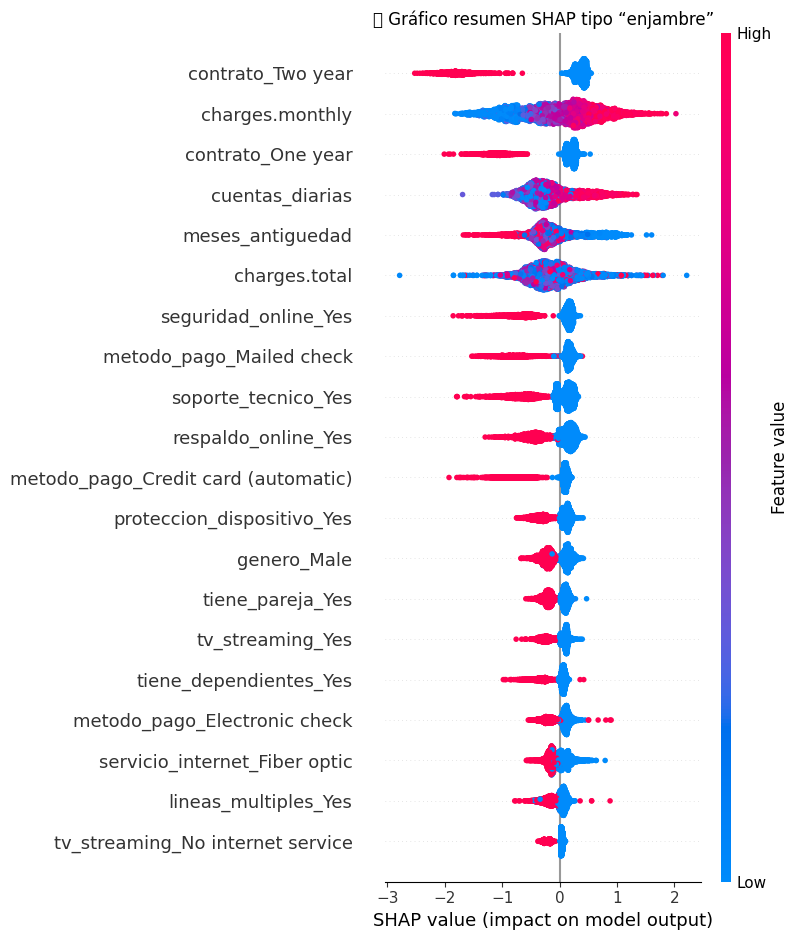

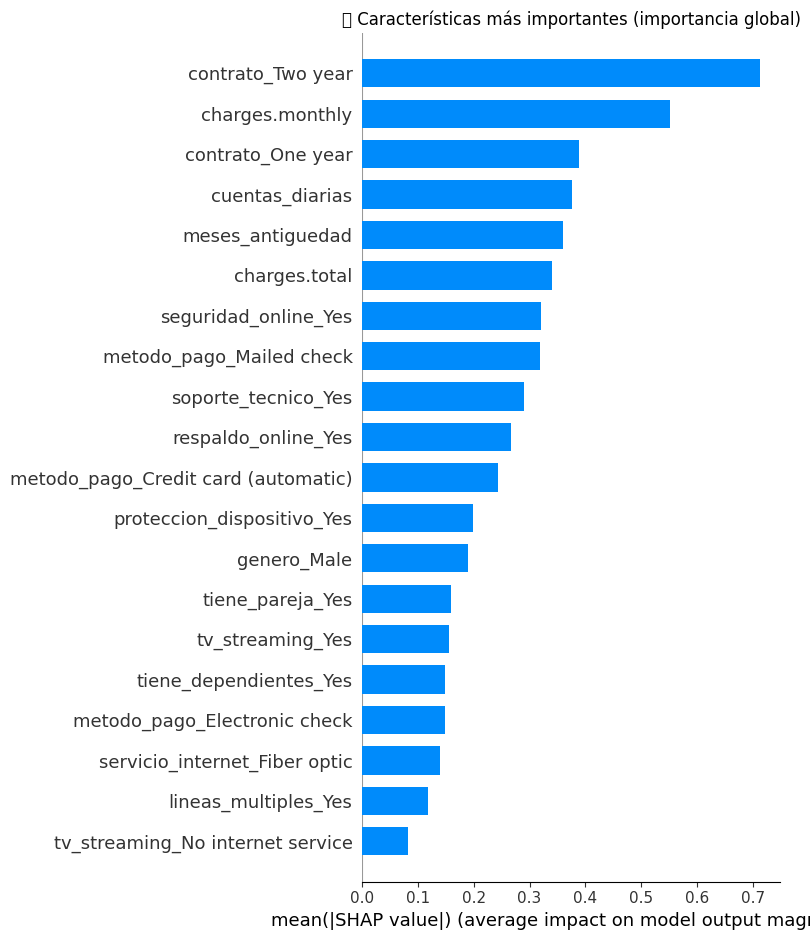

In [83]:
import shap
#se extrae el modelo GB del GridSearch (parte del ensemble)
best_gb = gs_gb.best_estimator_

#Se reconstruye el DataFrame con los nombres de las variables seleccionadas
X_train_df = pd.DataFrame(X_train, columns=selected_features)

#Se crea el explainer SHAP
explainer = shap.TreeExplainer(best_gb)

#Se calcula los valores SHAP sobre el conjunto de entrenamiento
shap_values = explainer.shap_values(X_train_df)

#Muestra la influencia de cada variable
plt.title('🔍 Gráfico resumen SHAP tipo “enjambre”')
shap.summary_plot(shap_values, X_train_df, show=True)

#importancia global de cada variable
plt.title('📊 Características más importantes (importancia global)')
shap.summary_plot(shap_values, X_train_df, plot_type='bar', show=True)

**Observaciones Shap**

🔎Estás gráficas permiten hacer una amplio análisis de las variables más influyentes, asi como patrones y otros factores.

1. 📌**Variables más influyentes**

El eje vertical está ordenado por importancia global (impacto medio absoluto de SHAP), por lo que las variables de arriba son las que más afectan las predicciones

1.  **contrato_Two year**: Tiene el mayor impacto absoluto.

*   Valores altos (contratos de dos años, en rojo) tienden a empujar el resultado hacia una predicción de no abandono (SHAP < 0).
*   Valores bajos (no tener contrato de dos años, en azul) tienden a aumentar la probabilidad de abandono.


2.   **charges.monthly**: Es el Segundo factor más influyente.


*   Valores altos (mensualidades elevadas, en rojo) aumentan la probabilidad de abandono (SHAP > 0).
*   Valores bajos (mensualidades bajas, en azul) tienden a retener clientes.


3.   **contrato_One year**: Es muy relevante, aunque menos que el contrato de dos años.


*   Funciona en sentido similar: contratos más largos → menor probabilidad de abandono.

4.  cuentas_diarias, meses_antiguedad, charges.total → Factores intermedios de peso, relacionados con el uso y la permanencia.


---

2. 📌**Patrón de colores y direcciones**


*   El color indica el valor de la variable (rojo = alto, azul = bajo).
*   La posición en el eje X indica el efecto sobre la salida del modelo (positivo → mayor probabilidad de abandono, negativo → menor).

Por ejemplo:

* En **charges.monthly**, puntos rojos (mensualidades altas) están mayormente a la derecha (aumentan el abandono).

* En **contrato_Two year**, puntos rojos están a la izquierda (disminuyen abandono).
---

3. 📌**Factores que parecen protectores vs. de riesgo**

* Protectores (reducen abandono): contrato de dos años, contrato de un año, mayor antigüedad, mayor total pagado (charges.total).
* De riesgo (aumentan abandono): mensualidades altas, pago con “Electronic check” (hacia abajo en la lista pero claramente sesgado a valores positivos de SHAP), uso de fibra óptica en el servicio de internet, no tener soporte técnico o respaldo online.




### 🎯Interpretabilidad con coeficientes de la Regresión Logística en el modelo Ensemble

In [85]:
# Se extraen coeficientes del pipeline
lr_model = gs_lr.best_estimator_.named_steps['clf']
feature_names = X_train.columns

# Se crea dataframe con coeficientes
df_coef = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': lr_model.coef_[0]
})
df_coef['Importancia (abs)'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='Importancia (abs)', ascending=False)

# Mostrar las variables más influyentes
print("🔍 Top 10 variables que más influyen en el abandono:")
display(df_coef.head(10))

🔍 Top 10 variables que más influyen en el abandono:


,Variable,Coeficiente,Importancia (abs)
1,meses_antiguedad,-0.595758,0.595758
3,charges.monthly,0.575408,0.575408
5,cuentas_diarias,0.575408,0.575408
26,contrato_Two year,-0.548126,0.548126
2,servicio_telefonico,-0.504651,0.504651
25,contrato_One year,-0.405394,0.405394
20,soporte_tecnico_Yes,-0.383901,0.383901
28,metodo_pago_Credit card (automatic),-0.373750,0.373750
14,seguridad_online_Yes,-0.371058,0.371058
30,metodo_pago_Mailed check,-0.333539,0.333539


**Observaciones**



1. 📌 **Dirección del efecto (signo del coeficiente)**

En regresión logística:

* Coeficiente positivo: La variable aumenta la probabilidad de abandono.

* Coeficiente negativo: La variable reduce la probabilidad de abandono (protege contra el churn).

Por ejemplo:

* Si **charges.monthly** tiene coeficiente positivo alto, clientes con mensualidades más altas tienen mayor probabilidad de irse.

* Si **contrato_Two year** tiene coeficiente muy negativo, tener contrato de 2 años reduce fuertemente la probabilidad de abandono.

2. 📌 **Magnitud de la influencia**

* La columna Importancia (abs) que calculaste muestra el efecto relativo, independientemente del signo.
* Las primeras posiciones en el ranking son las que más cambian la probabilidad de abandono en el modelo.
* Es común que aparezcan en el top:
--  Tipo de contrato (contrato_Two year, contrato_One year)
-- Costo mensual (charges.monthly)
-- Forma de pago (pago_Electronic check)
-- Uso de servicios adicionales (soporte, seguridad, etc.)




## 📄Informe Final TelecomX parte 2 - Factores que más influyen en la cancelación

### ✅ 1. Conclusiones Principales del proyecto

Se puede concluir a partir del uso de machine learning, se logro la creación de un modelo para intentar predecir el abandono o cancelación de los clientes(churn). El uso del modelo **Ensemble entre Regresión Logística y Gradient Boosting**. Permitio que se pudiera realizar análisis a los datos y otras métricas.
Ahora bien, considerando el análisis de los datos de TelecomX_LATAM_2, se ha identificado varias variables clave que influyen significativamente en la tasa de abandono (churn). A continuación, se presenta un informe basado en los hallazgos de los modelos y análisis visuales.

---



### 📶 2. Factores principales que más influyen en la cancelación
Del análisis estadístico y de interpretabilidad (coeficientes de la Regresión Logística y valores SHAP del modelo Ensemble), se identificaron 5 factores clave y son los siguientes:

1. **Tipo de contrato**


*   Los contratos **mensuales** incrementan significativamente la probabilidad de abandono.
*   Los contratos de **1 año** y especialmente de **2 años** reducen la cancelación, funcionando como un factor de retención natural.
2. Costo mensual **(charges.monthly)**


*   Las cuotas mensuales altas se podrían asociar con un mayor riesgo de cancelación, posiblemente por percepción de sobrecosto frente al valor recibido.

3. **Forma de pago**

*   Los clientes que usan **“Electronic check”** presentan una mayor tasa de cancelación.
* En contraste, medios automáticos como **tarjeta de crédito** se relacionan con mayor estabilidad y confianza del cliente a la hora de pagar.

4. Antigüedad y gasto acumulado **(tenure, charges.total)**



*   Se evidencio que clientes con **mayor antigüedad y mayor gasto acumulado** tienen menor probabilidad de abandonar la empresa.
*  Lo anterior sugiere un efecto de fidelización progresivo en los clientes.

5. **Servicios adicionales**
* La ausencia de servicios adicionales como **soporte técnico, seguridad online y respaldo en la nube** se asocia con mayor abandono.
* Estos servicios funcionan como elementos diferenciadores que aumentan la percepción de valor por el servicio que esta pagando el cliente.

---


### 📈3.Propuesta de estrategias de Retención Recomendadas

Con base en los hallazgos, se proponen acciones concretas:

1. **Incentivar contratos a largo plazo**
* Ofrecer descuentos o beneficios exclusivos al migrar de contrato mensual a contratos de 1 o 2 años.
* Estrategias de “upgrade” automático con promociones especiales (ejemplo: precio preferencial en el primer año de contrato largo).
2. **Ajustar y flexibilizar los costos mensuales**
* Implementar planes escalonados según consumo real para clientes con cargos mensuales altos.
* Promociones de “paquete personalizado” para reducir percepción de sobrecosto en la mente de los clientes.
3. **Optimizar los métodos de pago**
* Incentivar pagos automáticos con tarjeta mediante beneficios (cashback, descuentos o puntos de fidelidad).
* Reducir dependencia del método “Electronic check” al migrar clientes hacia medios digitales más confiables.
4. **Potenciar servicios de valor agregado**
* Promocionar servicios adicionales (seguridad online, soporte técnico, respaldo en la nube) como parte de paquetes integrales con un costo más económico por un periodo de tiempo.
* Diseñar campañas de marketing educativo que muestren a los clientes la utilidad real de estos servicios en la vida diaria y sus beneficios.
5. **Estrategias diferenciadas según antigüedad del cliente**
* Clientes nuevos (baja antigüedad): planes de bienvenida y programas de acompañamiento en los primeros meses.
* Clientes antiguos: programas de fidelización y recompensas por lealtad (descuentos progresivos, beneficios exclusivos).
